# HW1 G-S Problem 6 Extended Analysis

In [1]:
from itertools import permutations, product
from random import randint

## Gale Shapley Algorithm

In [2]:
def gale_shapley(mp, wp, verbose = False):

    # Initialize empty matching
    matches = dict.fromkeys(mp.keys())
    inv_map = {None: list(mp.keys())}

    count = 1

    num_matches = 0

    # While there is still an unmatched man
    while(inv_map.get(None)):

        if verbose:
            print(f"\nIteration {count}")
            count +=1
            print("Maps:", matches, inv_map)

        # Get the man and his preference list
        m = inv_map[None].pop(0)
        m_p = mp[m]

        if verbose:
            print("Current unmatched man and preferences:", m, m_p)

        # For each woman in m's preference list
        for w in m_p:
            # If w unmatched, match with m
            if w not in inv_map.keys():
                matches[m] = w
                num_matches += 1
                if verbose:
                    print(m, "matched with", matches[m])
                    print("New matches:", matches)
                inv_map[w] = m
                if verbose:
                    print(inv_map)
                break
            else:
                # Find current partner of w
                cp = inv_map[w][0]
                if verbose:
                    print(f"{w}'s current partner is {cp}")
                if wp[w].index(m) < wp[w].index(cp):
                    if verbose:
                        print(f"{m} at {wp[w].index(m)} is ranked higher than {cp} at {wp[w].index(cp)}")
                    matches[cp] = None
                    matches[m] = w
                    num_matches += 1
                    if verbose:
                        print(m, "matched with", matches[m])
                    inv_map[w] = m
                    inv_map[None].append(cp)
                    if verbose:
                        print(inv_map)
                    break
                else:
                    if verbose:
                        print(f"{m} at {wp[w].index(m)} is not ranked higher than {cp} at {wp[w].index(cp)}")
                        print("Checking next w...")
                    
    if verbose:
        print("\nX------Gale-Shapley Complete!------X")
    return matches, num_matches

## Generating All Possible Preferences

In [3]:
def generate_preferences(input_list):
    n = len(input_list)
    all_permutations = [list(p) for p in list(permutations(input_list, n))]
    all_combinations = [list(p) for p in list(product(all_permutations, repeat = n))]
    prefs_list = []
    for combo in all_combinations:
        le_dict = {}
        for ind, val in enumerate(input_list):
            le_dict[val] = combo[ind]
        prefs_list.append(le_dict)
    return prefs_list

In [4]:
m_prefs = generate_preferences(['a', 'b', 'c', 'd'])

In [5]:
w_prefs = m_prefs[randint(1, len(m_prefs) - 1)]

In [6]:
w_prefs

{'a': ['c', 'd', 'b', 'a'],
 'b': ['d', 'a', 'b', 'c'],
 'c': ['b', 'd', 'a', 'c'],
 'd': ['b', 'c', 'd', 'a']}

In [7]:
assert len(m_prefs) == 331776 #(which == (4!)^4)

In [8]:
prob_dict = {}

for mp in m_prefs:
    res, num = gale_shapley(mp, w_prefs)
    prob_dict[num] = prob_dict.get(num, 0) + 1

prob_dict

{7: 25408,
 8: 11292,
 6: 60864,
 9: 2660,
 5: 154128,
 11: 94,
 10: 231,
 4: 77088,
 12: 11}

In [9]:
import matplotlib.pyplot as plt

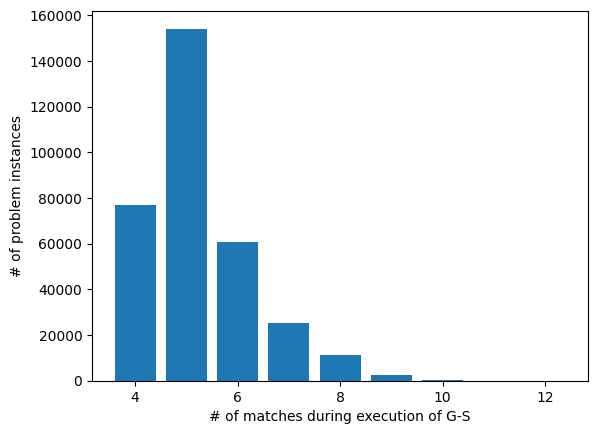

In [10]:
plt.bar(prob_dict.keys(), prob_dict.values())
plt.xlabel("# of matches during execution of G-S")
plt.ylabel("# of problem instances")
plt.show()